In [33]:

import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

try:
    from autoviz.AutoViz_Class import AutoViz_Class
except:
    !pip install autoviz
    from autoviz.AutoViz_Class import AutoViz_Class  

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [34]:
data = pd.read_csv("TRAIN.csv", index_col=0, parse_dates=['Date'])
unseen = pd.read_csv("TEST_FINAL.csv",index_col=0, parse_dates=['Date'])

print(data.shape)
print(unseen.shape)

(188340, 9)
(22265, 7)


In [35]:
data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [36]:
data = data.sort_values(['Date', 'Store_id'], ascending=[True, True])

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188340 entries, T1000001 to T1187984
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  int64         
 1   Store_Type     188340 non-null  object        
 2   Location_Type  188340 non-null  object        
 3   Region_Code    188340 non-null  object        
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  int64         
 6   Discount       188340 non-null  object        
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.4+ MB


In [38]:
# percentage of missing values in each column
round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False)

Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [39]:
data_dup = data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
data_dup.drop_duplicates(subset=None, inplace=True)
print(data.shape)
print(data_dup.shape)

(188340, 9)
(188340, 9)


In [40]:
data.head()

,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
ID,,,,,,,,,
T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
T1000115,2,S3,L1,R3,2018-01-01,1,Yes,25,18137.52
T1000128,3,S4,L2,R1,2018-01-01,1,Yes,72,57288.00
T1000097,4,S1,L1,R2,2018-01-01,1,Yes,80,53615.52
T1000133,5,S1,L1,R3,2018-01-01,1,Yes,47,36316.08


In [41]:
data.Store_Type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [42]:
data.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [43]:
data.Region_Code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [44]:
train      = data[data['Date']<= datetime(2018,12,31)]
validation = data[data['Date']> datetime(2018,12,31)]

print(train.shape)
print(validation.shape)

(133225, 9)
(55115, 9)


In [45]:
# Average sales by store_id
avg_sales_by_store_id = train.groupby(["Store_id"])["Sales"].median().to_dict()

In [46]:
train["Store_id"].replace(avg_sales_by_store_id, inplace=True)

In [47]:
train["Discount"].replace({'Yes':1,'No':0}, inplace=True)

In [48]:
eda_data_new=train.copy()

In [49]:
num_cols=list(train.columns)
print(num_cols)

['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Holiday', 'Discount', '#Order', 'Sales']


In [50]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

train = encode_and_bind(train,"Store_Type")
train = encode_and_bind(train,"Location_Type")
train = encode_and_bind(train,"Region_Code")

train.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

In [51]:
train.head()

,Store_id,Date,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4
ID,,,,,,,,,,,,,,,,
T1000001,34206.0,2018-01-01,1,1,9,7011.84,0,0,0,0,1,0,0,0,0,0
T1000115,45045.0,2018-01-01,1,1,25,18137.52,0,1,0,0,0,0,0,0,1,0
T1000128,59613.0,2018-01-01,1,1,72,57288.00,0,0,1,1,0,0,0,0,0,0
T1000097,38220.0,2018-01-01,1,1,80,53615.52,0,0,0,0,0,0,0,1,0,0
T1000133,41928.0,2018-01-01,1,1,47,36316.08,0,0,0,0,0,0,0,0,1,0


## Feature Engineering

In [52]:
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Dayofyear'] = train['Date'].dt.dayofyear
train['Weekofyear'] = train['Date'].dt.weekofyear
train['Dayofweek'] = train['Date'].dt.dayofweek
train['is_month_start'] = train['Date'].dt.is_month_start.astype(int)
train['is_month_end'] = train['Date'].dt.is_month_end.astype(int)
train['is_quarter_start'] = train['Date'].dt.is_quarter_start.astype(int)
train['is_quarter_end'] = train['Date'].dt.is_quarter_end.astype(int)

In [53]:
train.drop(['Date', '#Order'], axis=1, inplace=True)

In [54]:
train.head()

,Store_id,Holiday,Discount,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,...,Region_Code_R4,Month,Day,Dayofyear,Weekofyear,Dayofweek,is_month_start,is_month_end,is_quarter_start,is_quarter_end
ID,,,,,,,,,,,,,,,,,,,,,
T1000001,34206.0,1,1,7011.84,0,0,0,0,1,0,...,0,1,1,1,1,0,1,0,1,0
T1000115,45045.0,1,1,18137.52,0,1,0,0,0,0,...,0,1,1,1,1,0,1,0,1,0
T1000128,59613.0,1,1,57288.00,0,0,1,1,0,0,...,0,1,1,1,1,0,1,0,1,0
T1000097,38220.0,1,1,53615.52,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,0
T1000133,41928.0,1,1,36316.08,0,0,0,0,0,0,...,0,1,1,1,1,0,1,0,1,0


<AxesSubplot:xlabel='Store_id', ylabel='Density'>

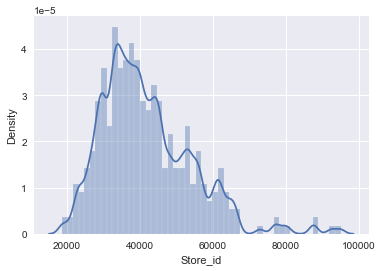

In [55]:
sns.distplot(train['Store_id'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

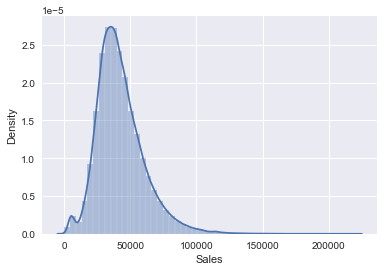

In [56]:
#sns.pairplot(train,corner=True,diag_kind='kde')
sns.distplot(train['Sales'])

<AxesSubplot:ylabel='Density'>

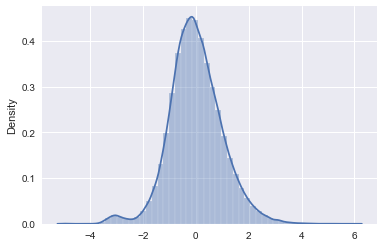

In [57]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

sales_transform = pt.fit_transform(train['Sales'].values[:,np.newaxis])
sns.distplot(sales_transform)

### Visuvalization

In [58]:
train.to_csv("train_for_data_viz.csv")

In [59]:
AV = AutoViz_Class()

In [60]:
# dft = AV.AutoViz("train_for_data_viz.csv",depVar="Sales",dfte=None,header=0,verbose=2,lowess=False,)

In [61]:
eda_data=train.copy()

In [62]:
numerical_cols=list(train.columns)

In [63]:
print(numerical_cols)

['Store_id', 'Holiday', 'Discount', 'Sales', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Month', 'Day', 'Dayofyear', 'Weekofyear', 'Dayofweek', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']


In [64]:
# plot_cols=['Store_id', 'Holiday', 'Discount', 'Sales', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Month', 'Day', 'Dayofyear', 'Weekofyear', 'Dayofweek', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']
# sns.pairplot(train[plot_cols],hue='Sales',corner=True,diag_kind='kde')

# plt.show()

### Univariate Categorical Analysis

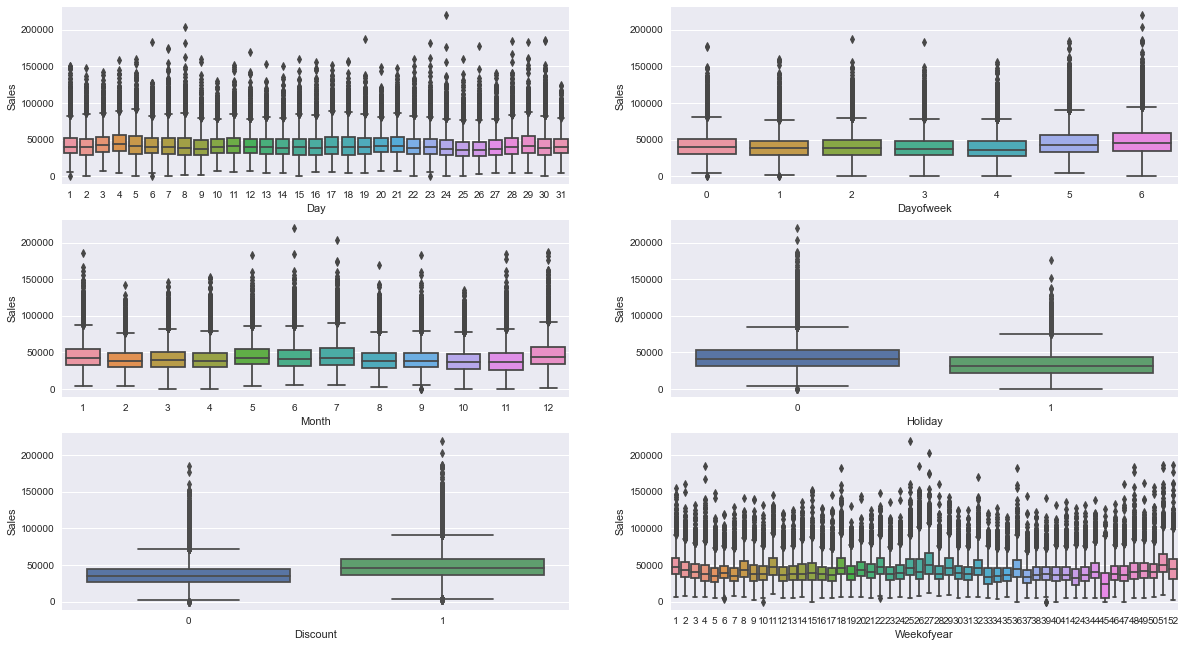

In [74]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'Day', y = 'Sales', data =eda_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'Dayofweek', y = 'Sales', data =eda_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'Month', y = 'Sales', data =eda_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'Holiday', y = 'Sales', data =eda_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'Discount', y = 'Sales', data =eda_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'Weekofyear', y = 'Sales', data =eda_data)

plt.show()


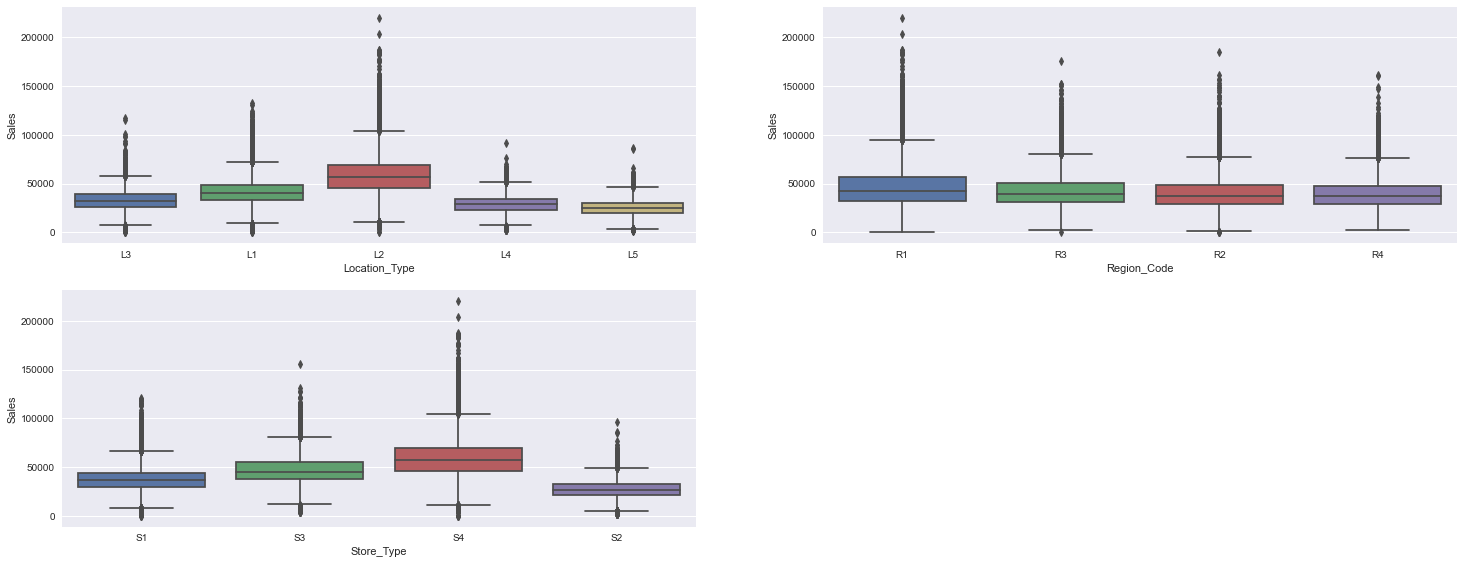

In [92]:
plt.figure(figsize=(25, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Location_Type', y = 'Sales', data =eda_data_new)
plt.subplot(4,2,2)
sns.boxplot(x = 'Region_Code', y = 'Sales', data =eda_data_new)
plt.subplot(4,2,3)
sns.boxplot(x = 'Store_Type', y = 'Sales', data =eda_data_new)


plt.show()


<AxesSubplot:xlabel='#Order', ylabel='Sales'>

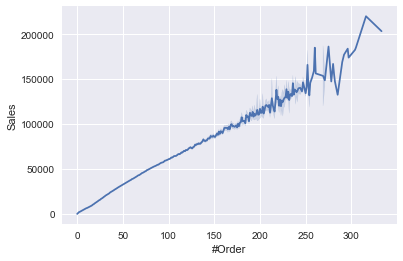

In [77]:
plt.figure(figsize=(25, 20))
sns.lineplot(data=eda_data_new, x="#Order", y="Sales")

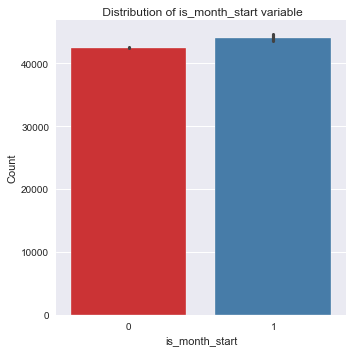

In [94]:
plt.figure(figsize=(5,5))
var='is_month_start'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

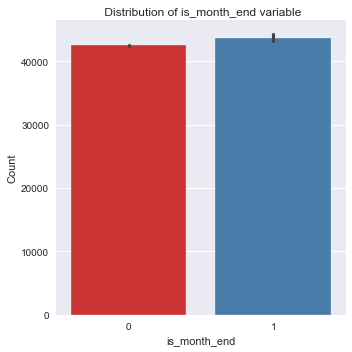

In [95]:
plt.figure(figsize=(5,5))
var='is_month_end'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

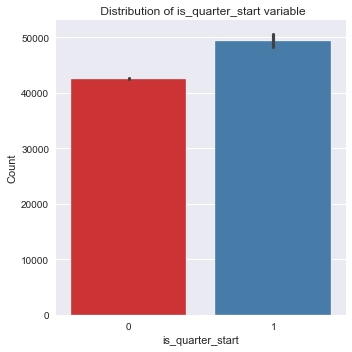

In [96]:
plt.figure(figsize=(5,5))
var='is_quarter_start'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

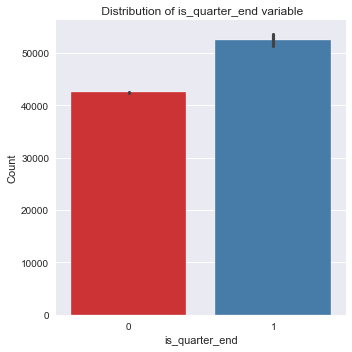

In [97]:
plt.figure(figsize=(5,5))
var='is_quarter_end'
sns.barplot(x=var,y='Sales',data=eda_data, palette = 'Set1')
plt.title(" Distribution of "+var+" variable")
plt.xlabel(var)
plt.ylabel("Count")

plt.tight_layout() 
plt.show()

<AxesSubplot:>

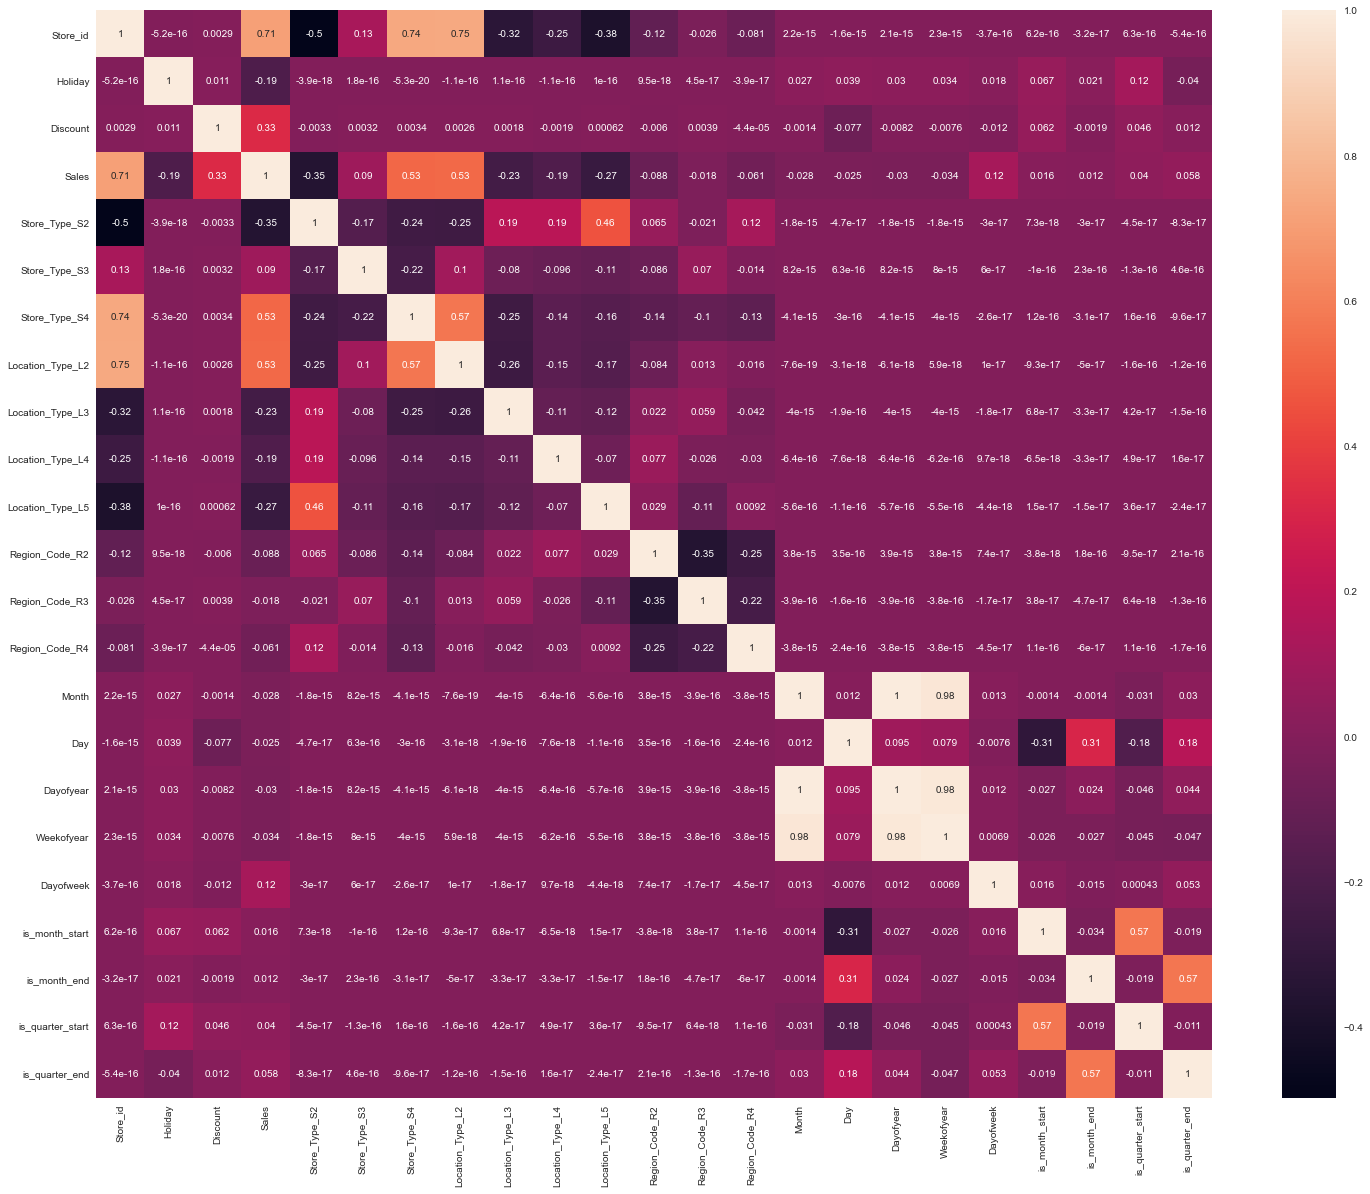

In [90]:
plt.figure(figsize=(25, 20))
sns.heatmap(eda_data[numerical_cols].corr(),annot=True)

<AxesSubplot:>

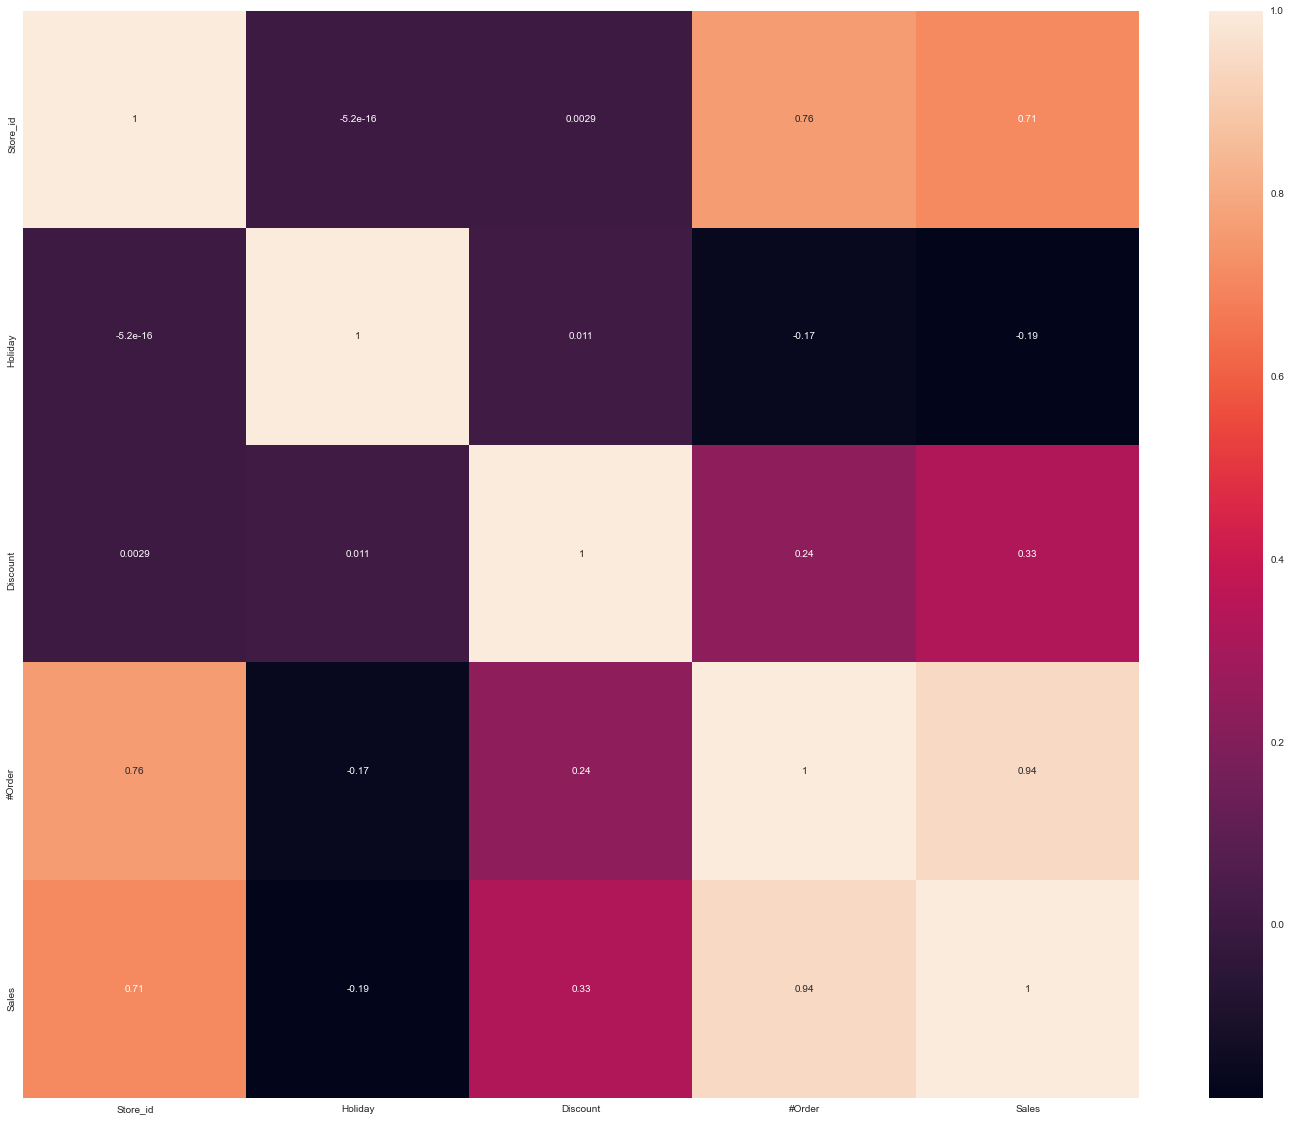

In [91]:
plt.figure(figsize=(25, 20))
sns.heatmap(eda_data_new[num_cols].corr(),annot=True)

In [ ]:
y_train = pd.Series(np.ravel(sales_transform), index=train.index)
X_train =train.loc[:,train.columns !='Sales']

In [ ]:
X_train.head()

In [ ]:
y_train.head()

## Model Building

In [ ]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression

In [ ]:
#Create a linear regression estimator 

linreg = LinearRegression()

#Use RFECV to pick best features, using Stratified Kfold
rfecv =   RFECV(linreg, cv=5, scoring='neg_mean_squared_error',verbose = 1,n_jobs=-1)

In [ ]:

selector = rfecv.fit(X_train, y_train)
selector.support_

In [ ]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

In [ ]:
print("Optimal number of features from RFECV :")
print(selector.n_features_)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

feat_imp = pd.Series(reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(n_estimators = 100, max_depth=5)
rand_reg.fit(X_train, y_train)

rand_feat_imp = pd.Series(rand_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

rand_feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_train_col=X_train.copy()

In [ ]:
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

In [ ]:
X_train_col.drop('Month',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
X_train_col.drop('Weekofyear',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:

X_train_1=sm.add_constant(X_train_col)    # Adding constant
X_train_1.shape

In [ ]:
lm_1 = sm.OLS(y_train,X_train_1).fit()
print(lm_1.summary())

In [ ]:
#Removing kw_max_min and building model
X_train_2=X_train_1.drop('Region_Code_R3', axis=1)   

### Model 2

In [ ]:
lm_2 = sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

In [ ]:
#Removing kw_max_min and building model
X_train_3=X_train_2.drop('Region_Code_R2', axis=1)   

### Model 3

In [ ]:
lm_3 = sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

In [ ]:
#Predict values
y_train_pred_scaled = lm_3.predict(X_train_3)

In [ ]:
y_train_scaled_arr = y_train.values.ravel()
print(y_train_scaled_arr.shape)

In [ ]:
res=y_train_scaled_arr- y_train_pred_scaled

In [ ]:
fig = plt.figure()
plt.scatter(y_train_pred_scaled,res)
fig.suptitle('y_train_pred vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16) 

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
sm.qqplot(res,line='s')
plt.show()

In [ ]:
residual_results=pd.DataFrame()
residual_results['Actual'] = y_train
residual_results['predicted'] = y_train_pred_scaled.values
residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
residual_results['sales']=train['Sales'].values
residual_results['predicted_sales'] = pt.inverse_transform(y_train_pred_scaled[:, np.newaxis])

In [ ]:
residual_results.head()

In [ ]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true,y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MSLE: ', round(msle,4))

In [ ]:
regression_results(residual_results['sales'].values, residual_results['predicted_sales'].values)

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
from xgboost import XGBRegressor

xgbr_pipeline = Pipeline([("xgbr_model", XGBRegressor(objective="reg:squarederror", verbosity=1, 
                                                      random_state=42, n_jobs=-1))])

xgbr_pipeline_params = {
                        "xgbr_model__max_depth": [5],
                        "xgbr_model__learning_rate": [0.01,0.1],
                    }

xgbr_grid_pipeline = GridSearchCV(xgbr_pipeline, xgbr_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
xgbr_grid_pipeline.fit(X_train,y_train)
print(xgbr_grid_pipeline.best_params_)
xgbr_model = xgbr_grid_pipeline.best_estimator_
print(xgbr_grid_pipeline.best_score_)


In [ ]:
y_train_pred_xgbr = xgbr_model.predict(X_train)

In [ ]:
xgbr_residual = pd.DataFrame()
xgbr_residual['Actual'] = y_train
xgbr_residual['predicted'] = y_train_pred_xgbr
xgbr_residual['residual'] = xgbr_residual['Actual'] - xgbr_residual['predicted']
xgbr_residual['sales'] = train['Sales'].values
xgbr_residual['predicted_sales'] =  pt.inverse_transform(y_train_pred_xgbr[:,np.newaxis]).ravel()
xgbr_residual.head()

In [ ]:
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.neighbors import KNeighborsRegressor


# knn_pipeline = Pipeline([("knn", KNeighborsRegressor())])

# knn_pipeline_params = {'knn__n_neighbors': list(range(40,100,4))}

# knn_grid_pipeline = GridSearchCV(knn_pipeline, knn_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# knn_grid_pipeline.fit(X_train, y_train)
# print(knn_grid_pipeline.best_params_)
# knn_model = knn_grid_pipeline.best_estimator_
# print(knn_grid_pipeline.best_score_)


In [ ]:
# y_train_pred_knn = knn_model.predict(X_train)

In [ ]:
# knn_residual = pd.DataFrame()
# knn_residual['Actual'] = y_train
# knn_residual['predicted'] = y_train_pred_knn
# knn_residual['residual'] = knn_residual['Actual'] - knn_residual['predicted']
# knn_residual['sales'] = train['Sales'].values
# knn_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_knn[:,np.newaxis]).ravel()
# knn_residual.head()

In [ ]:
from sklearn.feature_selection import SelectFromModel

rf_pipeline = Pipeline([("rfr", RandomForestRegressor(criterion='mse', random_state=100, max_features='sqrt',n_jobs=-1,verbose=1))])

rf_pipeline_params = {"rfr__n_estimators":[100,200],
           "rfr__max_leaf_nodes":[30,60],
            "rfr__bootstrap":[True ,False]}

rf_grid_pipeline = GridSearchCV(rf_pipeline, rf_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
rf_grid_pipeline.fit(X_train, y_train)
print(rf_grid_pipeline.best_params_)
rf_model = rf_grid_pipeline.best_estimator_
print(rf_grid_pipeline.best_score_)

In [ ]:
y_train_pred_rf = rf_model.predict(X_train)

In [ ]:
rf_residual = pd.DataFrame()
rf_residual['Actual'] = y_train
rf_residual['predicted'] = y_train_pred_rf
rf_residual['residual'] = rf_residual['Actual'] - rf_residual['predicted']
rf_residual['sales'] = train['Sales'].values
rf_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_rf[:,np.newaxis]).ravel()
rf_residual.head()

In [ ]:
# from sklearn.svm import SVR

In [ ]:
# svr_pipeline = Pipeline([("svr", SVR(kernel='rbf'))])
# svr_pipeline_params = {"svr__C":[0.01, 0.1]}

# svr_grid_pipeline = GridSearchCV(svr_pipeline, svr_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# svr_grid_pipeline.fit(X_train, y_train)
# print(svr_grid_pipeline.best_params_)
# svr_model = svr_grid_pipeline.best_estimator_
# print(svr_grid_pipeline.best_score_)

In [ ]:
# y_train_pred_svr = svr_model.predict(X_train)

In [ ]:
# svr_residual = pd.DataFrame()
# svr_residual['Actual'] = y_train
# svr_residual['predicted'] = y_train_pred_svr
# svr_residual['residual'] = svr_residual['Actual'] - svr_residual['predicted']
# svr_residual['sales'] = train['Sales'].values
# svr_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_svr[:,np.newaxis]).ravel()
# svr_residual.head()

## Predictions on the test dataset

In [ ]:
print(validation.shape)
validation["Store_id"].replace(avg_sales_by_store_id, inplace=True)
validation["Discount"].replace({'Yes':1,'No':0}, inplace=True)


In [ ]:
validation = encode_and_bind(validation,"Store_Type")
validation = encode_and_bind(validation,"Location_Type")
validation = encode_and_bind(validation,"Region_Code")

In [ ]:

validation.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

validation.head()

In [ ]:
validation['Month'] = validation['Date'].dt.month
validation['Day'] = validation['Date'].dt.day
validation['Dayofyear'] = validation['Date'].dt.dayofyear
validation['Weekofyear'] = validation['Date'].dt.weekofyear
validation['Dayofweek'] = validation['Date'].dt.dayofweek
validation['is_month_start'] = validation['Date'].dt.is_month_start.astype(int)
validation['is_month_end'] = validation['Date'].dt.is_month_end.astype(int)
validation['is_quarter_start'] = validation['Date'].dt.is_quarter_start.astype(int)
validation['is_quarter_end'] = validation['Date'].dt.is_quarter_end.astype(int)

validation.drop(['Date', '#Order'], axis=1, inplace=True)


In [ ]:
sales_transform_val = pt.transform(validation['Sales'].values[:,np.newaxis])

In [ ]:
y_validation = pd.Series(np.ravel(sales_transform_val), index=validation.index)
X_validation =validation.loc[:,validation.columns !='Sales']

In [ ]:
X_validation.head()

### Linear Regression Model

In [ ]:

def plot_errors(model,X_input, y_actual, title):
    y_train_pred = model.predict(X_input)
    try:
        residu=y_actual.values.ravel()- y_train_pred.ravel() ##can use reshape(-1,1) instead of ravel to covert to (n,)
    except:
        residu=y_actual.values.ravel()- y_train_pred.values

    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3,figsize=(16,4))

    ax1.scatter(y_train_pred,residu)
    ax1.set_xlabel('y_pred')                          # X-label
    ax1.set_ylabel('residual') 
    ax1.set_title('y_pred vs residual')

    sns.distplot((residu), bins = 20,ax=ax2)
    ax2.set_xlabel('Errors')                         # X-label
    ax2.set_title('Density plot of residuals')

    sm.qqplot(residu,line='s',ax=ax3)
    ax3.set_title('QQ Plot')
    plt.suptitle(title)
    plt.show()



In [ ]:
plot_errors(lm_3, sm.add_constant(X_validation)[X_train_3.columns], y_validation, 'Linear Regression')

In [ ]:

def residual_errors(model,X_input, y_actual):
    y_train_pred = model.predict(X_input)
    residual_results=pd.DataFrame()
    residual_results['Actual'] =y_actual.values.ravel()
    residual_results['predicted'] = y_train_pred.ravel()
    residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
    residual_results['sales']= validation['Sales'].copy()
    residual_results['predicted_sales'] = pt.inverse_transform(y_train_pred[:, np.newaxis])
    residual_results.index = X_input.index
    return residual_results

In [ ]:
test_residual_results_lr = residual_errors(lm_3, sm.add_constant(X_validation)[X_train_3.columns], y_validation)

In [ ]:
test_residual_results_lr['sales'] = validation['Sales'].copy()
test_residual_results_lr.head()

In [ ]:
def regression_metrics(df, model):

    print("\n")
    print("Regression results for actual shares   : ", model, "\n")
    regression_results(df['sales'].values, df['predicted_sales'].values)

In [ ]:
regression_metrics(test_residual_results_lr, 'Linear Regression')

### XGBR on whole dataset

In [ ]:
y_test_pred_xgbr = xgbr_model.predict(X_validation)

In [ ]:
plot_errors(xgbr_model, X_validation, y_validation, 'XGB Regression')

In [ ]:
test_residual_results_xgbr = residual_errors(xgbr_model,X_validation, y_validation)

test_residual_results_xgbr['sales'] = validation['Sales'].copy()
test_residual_results_xgbr.head()

In [ ]:
regression_metrics(test_residual_results_xgbr, 'XGB Regression')

### Random Forest Regressor

In [ ]:
plot_errors(rf_model, X_validation, y_validation, 'XGB Regression')

In [ ]:
test_residual_results_rf = residual_errors(rf_model,X_validation, y_validation)

test_residual_results_rf['sales'] = validation['Sales'].copy()
test_residual_results_rf.head()

In [ ]:
regression_metrics(test_residual_results_rf, 'RF Regression')

### Stacking

In [ ]:
stacking = pd.DataFrame()
stacking['lr']     = test_residual_results_lr['predicted'].values

stacking['xgbr']   = test_residual_results_xgbr['predicted'].values
stacking['rf']     = test_residual_results_rf['predicted'].values

stacking['actual'] = test_residual_results_rf['Actual'].values

In [ ]:
stacking.head()

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
stack_pipeline = Pipeline([("elasticnet", ElasticNet(random_state=0))])

stack_pipeline_params = {'elasticnet__l1_ratio':[0,0.2,0.5,0.8,1],
                            'elasticnet__alpha':[0.001,0.01,0.1,],
                           'elasticnet__fit_intercept':[True,False]}

stack_grid_pipeline = GridSearchCV(stack_pipeline, stack_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
stack_grid_pipeline.fit(stacking[['lr','xgbr','rf']],stacking['actual'])
print(stack_grid_pipeline.best_params_)
stack_model = stack_grid_pipeline.best_estimator_
print(stack_grid_pipeline.best_score_)

# Final Submission

In [ ]:
print(unseen.shape)
unseen["Store_id"].replace(avg_sales_by_store_id, inplace=True)
unseen["Discount"].replace({'Yes':1,'No':0}, inplace=True)


In [ ]:

unseen = encode_and_bind(unseen,"Store_Type")
unseen = encode_and_bind(unseen,"Location_Type")
unseen = encode_and_bind(unseen,"Region_Code")

In [ ]:
unseen.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

unseen.head()

In [ ]:
unseen['Month'] = unseen['Date'].dt.month
unseen['Day'] = unseen['Date'].dt.day
unseen['Dayofyear'] = unseen['Date'].dt.dayofyear
unseen['Weekofyear'] = unseen['Date'].dt.weekofyear
unseen['Dayofweek'] = unseen['Date'].dt.dayofweek
unseen['is_month_start'] = unseen['Date'].dt.is_month_start.astype(int)
unseen['is_month_end'] = unseen['Date'].dt.is_month_end.astype(int)
unseen['is_quarter_start'] = unseen['Date'].dt.is_quarter_start.astype(int)
unseen['is_quarter_end'] = unseen['Date'].dt.is_quarter_end.astype(int)

unseen.drop(['Date'], axis=1, inplace=True)


In [ ]:
X_unseen =unseen.loc[:,unseen.columns !='Sales']

In [ ]:
X_unseen.head()

### Linear Regression submission

In [ ]:
linear_results =pd.DataFrame()
linear_results['lr']=  lm_3.predict(sm.add_constant(X_unseen)[X_train_3.columns])

In [ ]:
submission_1_lr = pd.DataFrame()
submission_1_lr['ID'] = X_unseen.index
submission_1_lr['Sales'] = pt.inverse_transform(linear_results.lr.values[:, np.newaxis])

In [ ]:
submission_1_lr.head()

In [ ]:
submission_1_lr.to_csv("submission_1_lr.csv", index=False)

### XGBR submission

In [ ]:
y_unseen_pred_xgbr = xgbr_model.predict(X_unseen)

In [ ]:
submission_2_xgbr = pd.DataFrame()
submission_2_xgbr['ID'] = X_unseen.index
submission_2_xgbr['Sales'] = pt.inverse_transform(y_unseen_pred_xgbr[:, np.newaxis])

In [ ]:
submission_2_xgbr.head()

In [ ]:
submission_2_xgbr.to_csv("submission_2_xgbr.csv", index=False)

### RF submission

In [ ]:
y_unseen_pred_rf = rf_model.predict(X_unseen)

In [ ]:
submission_3_rf = pd.DataFrame()
submission_3_rf['ID'] = X_unseen.index
submission_3_rf['Sales'] = pt.inverse_transform(y_unseen_pred_rf[:, np.newaxis])

In [ ]:
submission_3_rf.head()

In [ ]:
submission_3_rf.to_csv("submission_3_rf.csv", index=False)

## Stacking on unseen dataset

In [ ]:
unseen_stacking = pd.DataFrame()

unseen_stacking['lr']     = linear_results['lr'].values
unseen_stacking['xgbr']   = xgbr_model.predict(X_unseen)
unseen_stacking['rf']     = rf_model.predict(X_unseen)


In [ ]:
unseen_stacking.head()

In [ ]:
stacking_submission = pd.DataFrame()
stacking_submission['ID']= X_unseen.index
stacking_submission['Sales'] = pt.inverse_transform(stack_model.predict(unseen_stacking)[:, np.newaxis]) 

In [ ]:
stacking_submission.head()

In [ ]:
stacking_submission.to_csv("submission_4_stacking.csv", index= False)